# Model: Gradient Boost

### Importing Libraries

In [1]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### Loading in Data

In [2]:
with open("top10_df.pkl",'rb') as fp:
    df = pickle.load(fp)

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [6]:
# Importing the model
from sklearn.ensemble import GradientBoostingClassifier

# Fitting and training
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Printing out Evaluation Metrics

In [7]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.34      0.01      0.03      2236
         Buy       0.50      0.09      0.15      4417
        Hold       0.57      0.96      0.71      8390

   micro avg       0.56      0.56      0.56     15043
   macro avg       0.47      0.35      0.30     15043
weighted avg       0.51      0.56      0.45     15043



### Confusion Matrix

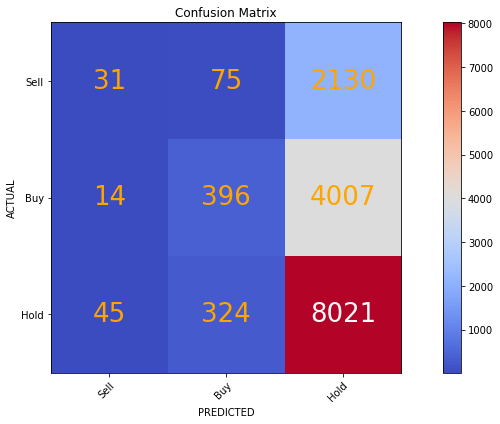

In [8]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [17]:
from sklearn.model_selection import RandomizedSearchCV

_(Due to processing time, randomized search is used over grid search)_

### Parameters

In [18]:
# Parameters to Tune
params = {'n_estimators': [50,100],
          'learning_rate': [1,0.1,.01],
          'max_depth': [None, 3, 5],
          'min_samples_split': [5,10],
          'min_samples_leaf': [1, 3, 5]}

In [20]:
search = RandomizedSearchCV(clf, params, n_iter=20, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1, score=0.3657989898245555, total= 2.4min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1, score=0.3506220617940425, total= 1.7min
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=1, score=0.35777809623675055, total= 2.4min
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.5min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.2998376633226056, total=  13.4s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.7min remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.29746860460859925, total=  13.2s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_depth=5, learning_rate=0.1, score=0.2965510296623599, total=  13.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1, score=0.3134637301424858, total=  24.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1, score=0.30813108670499684, total=  24.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=3, learning_rate=0.01, score=0.2568840998902972, total=  15.6s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=3, learning_rate=0.01 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=3, learning_rate=0.01, score=0.2542966320754787, total=  15.3s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=3, learning_rate=0.01 


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_depth=3, learning_rate=0.01, score=0.2687292390164497, total=  15.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1, score=0.3019868813320799, total=  13.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1, score=0.2989594956166553, total=  13.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=5, max_depth=5, learning_rate=0.1, score=0.2978090554177264, total=  13.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=3, learning_rate=1 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, m

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_depth=None, learning_rate=0.1, score=0.34523750888806054, total=13.8min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 78.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [50, 100], 'learning_rate': [1, 0.1, 0.01], 'max_depth': [None, 3, 5], 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 3, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1_macro', verbose=5)

### Tuned Results

In [21]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.503116080052106
Mean Testing Score: 0.9999711281559615

Best Parameter Found:


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': None,
 'learning_rate': 1}

### Model with the Best Parameters

In [22]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Results from Optimum Parameters

In [23]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.25      0.10      0.15      2236
         Buy       0.35      0.23      0.28      4417
        Hold       0.57      0.76      0.65      8390

   micro avg       0.51      0.51      0.51     15043
   macro avg       0.39      0.37      0.36     15043
weighted avg       0.46      0.51      0.47     15043



### Confusion Matrix for Optimum Parameters

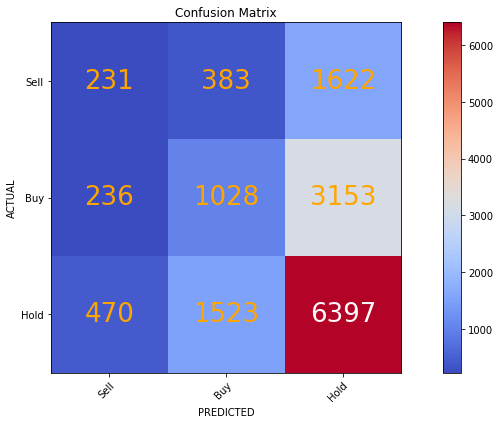

In [24]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()